In [2]:
# Nettoyage de la table RealGdp.xls

In [3]:
import os
import numpy as np
import pandas as pd
import statsmodels.tsa.filters.hp_filter as stat
import numbers
import matplotlib.pyplot as plt

In [4]:
#On utilisera data_directory pour aller chercher nos données
wd=os.getcwd()    #votre dossier local (qui est un clone du repo du groupe) a son nom bien à lui. 
data_directory = wd+"\\Donnees" 
data_directory

'C:\\Users\\tayoy\\Documents\\GitHub\\Statapp-Macroeconomie\\Donnees'

In [5]:
file="RealGDPYanis.xls" #fichier manuellement modifié pour supprimer les en-têtes qui empêchaient sa lecture par pd.read_excel
pthfile=data_directory+"\\\\"+"RealGDP_SansHeaders.xls"

In [6]:
df = pd.read_excel(io=pthfile,index_col = 0 ,usecols = "A:IU",header=0)

In [7]:
pays=""
#Séparation des infos non numériques. On les garde dans ce petit DataFrame au cas où
infos_data = df[['Scale','Base Year']] 
infos_data.head()

,Scale,Base Year
Country,,
Argentina,Millions,2004
Australia,Millions,2019/2020
Austria,Millions,2010
Belgium,Millions,2010
Brazil,Millions,1995


In [130]:
liste_pays=['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Japan', 'Norway', 'Netherlands, The', 'New Zealand', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom','United States']


In [154]:
#création du dataFrame qui nous intéresse vraiment :
GDP = df.iloc[:,2:].T #sélection des colones et transposition
pays_en_trop=[i for i in GDP.columns if i not in liste_pays]
GDP=GDP.drop(pays_en_trop,axis=1)



In [155]:
types=GDP.applymap(lambda x: isinstance(x,numbers.Number)) #Identifie les entrées qui ne sont pas des nombres (le xls est lu tels que les NaN sont des '...' de type str)
GDP=GDP[types].astype(float) #Remplace les entrées qui ne sont pas des nombres par des NaN
GDP
test_log = False #pour ne pas reprendre le log lors des manipulations sur le notebook

In [156]:
#Remplacement des index (str de format '1959Q1') par des floats pour faciliter les traitements
GDP['Time']=([float(i[:4])+(float(i[-1])-1)/4 for i in (list(GDP.index))])
GDP.set_index(['Time'], inplace=True) 

In [157]:
if test_log==False:
    GDP=np.log(GDP) #Cette étape est à faire pour toutes les variables sauf 'employment rate :
    test_log=True
else :
    print('log déjà appliqué !')

In [158]:
Fr=GDP['France'].dropna()

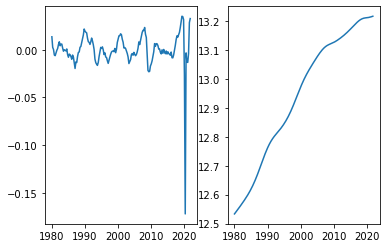

In [159]:
cycles,tendance =stat.hpfilter(Fr, lamb=1600) #attention, il faut nettoyer les NaN dans les séries ! 
figure, axis = plt.subplots(1,2)
axis[0].plot(Fr.index,cycles)
axis[1].plot(Fr.index,tendance)

#all(tendance+cycles==Fr) #test de conformité


In [213]:
def middlegap(S):
    #permet de s'assurer qu'il n'y a pas de trou (NaN) entre deux valeurs remplies dans une série
    return(any(np.diff(pd.isna(S).astype(int))==1))

def first_value(S):
    #retourne l'index et le range du début de la série S (le premier non NaN)
    for i in S.index:
        if not pd.isna(S[i]):
            return [i,S.index.get_loc(i)]

In [217]:
first_value(GDP['Italy'])


[1996.0, 148]

In [215]:
(GDP['Italy']).iloc[first_value(GDP['Italy'])[1]:]  #test de fonctionement      

Time
1996.00    12.786392
1996.25    12.785338
1996.50    12.786818
1996.75    12.783770
1997.00    12.787120
             ...    
2020.75    12.847590
2021.00    12.849596
2021.25    12.875580
2021.50    12.902564
2021.75    12.909315
Name: Italy, Length: 104, dtype: float64

In [211]:
def corr(S1,S2, start, stop istart, istop):
    #retourne la corrélation entre deux séries sur un intervalle donné par start et stop ou istart et istop
    

True